In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv('data/aps_failure_training_set.csv')
train_df.pop('id')

0            1
1            2
2            3
3            4
4            5
         ...  
59995    59996
59996    59997
59997    59998
59998    59999
59999    60000
Name: id, Length: 60000, dtype: int64

In [3]:
train_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [4]:
cols = pd.Series(train_df.columns)

In [5]:
counts = cols.apply(lambda x: x.split("_")[0]).value_counts().to_dict()
categorical_cols_idx = cols.apply(
    lambda x: True if counts[x.split("_")[0]] > 1 else False)

In [6]:
#get the columns that are categorical
categorical_cols = cols[categorical_cols_idx]

In [7]:
categorical_cols

7      ag_000
8      ag_001
9      ag_002
10     ag_003
11     ag_004
        ...  
164    ee_005
165    ee_006
166    ee_007
167    ee_008
168    ee_009
Length: 70, dtype: object

In [8]:
train_df[categorical_cols]

,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,...,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0
1,0,0,0,0,18254,653294,1720800,516724,31642,0,...,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500
2,0,0,0,0,1648,370592,1883374,292936,12016,0,...,262032,453378,277378,159812,423992,409564,320746,158022,95128,514
3,0,0,0,318,2212,3232,1872,0,0,0,...,5670,1566,240,46,58,44,10,0,0,0
4,0,0,0,0,43752,1966618,1800340,131646,4588,0,...,404740,904230,622012,229790,405298,347188,286954,311560,433954,1218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,2564,59100,1603216,6015982,1968266,164972,12560,...,1608808,1479066,998500,566884,1290398,1218244,1019768,717762,898642,28588
59996,0,0,0,0,104,99186,36564,128,0,0,...,13934,15024,10578,6760,21126,68424,136,0,0,0
59997,0,0,0,0,28,11592,11538,0,0,0,...,15876,2740,792,386,452,144,146,2622,0,0
59998,0,0,0,0,330,202498,3251010,2061456,360436,59754,...,1180714,1709450,699352,222654,347378,225724,194440,165070,802280,388422


In [9]:
categorical_cols.apply(lambda x: x.split("_")[0]).value_counts().to_dict()

{'ag': 10, 'ay': 10, 'az': 10, 'ba': 10, 'cn': 10, 'cs': 10, 'ee': 10}

<Axes: >

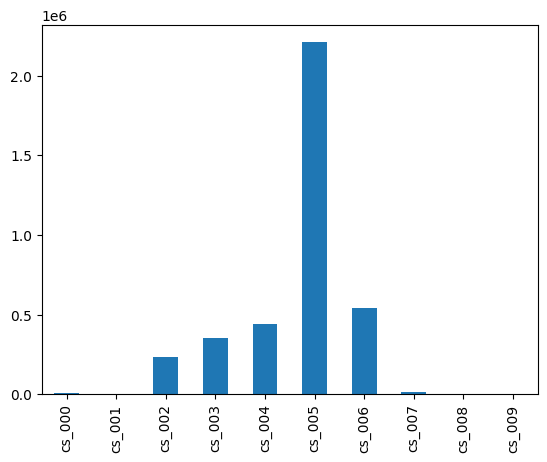

In [10]:
#given this dataset plot the means train_df.filter(regex='cs_[0-9][0-9][0-9]')
train_df.filter(regex='cs_[0-9][0-9][0-9]').replace('na', 0).astype(int).mean().plot(kind='bar')

<Axes: >

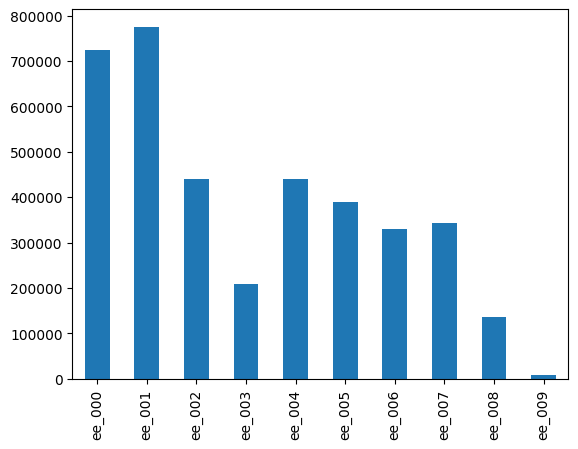

In [11]:
train_df.filter(regex='ee_[0-9][0-9][0-9]').replace('na', 0).astype(int).mean().plot(kind='bar')

<Axes: >

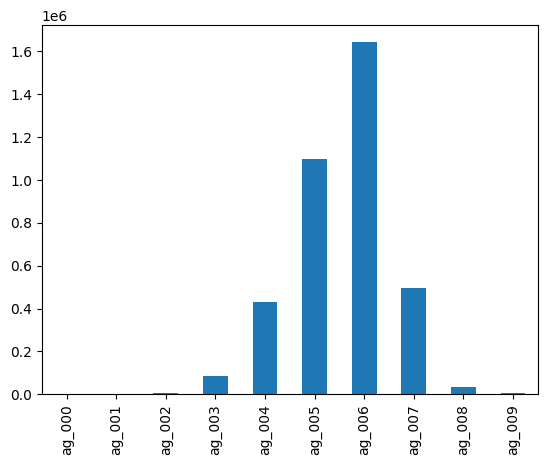

In [12]:
train_df.filter(regex='ag_[0-9][0-9][0-9]').replace('na', 0).astype(int).mean().plot(kind='bar')

<Axes: >

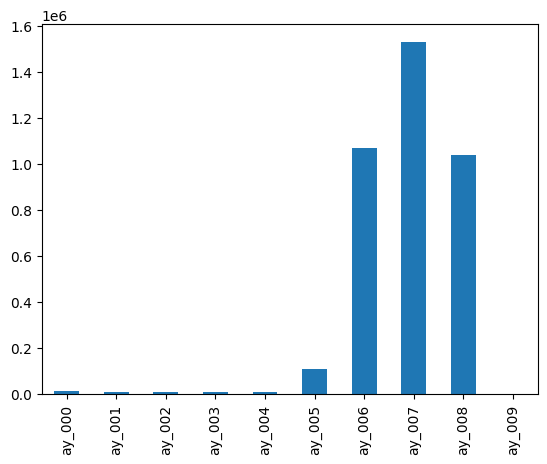

In [13]:
train_df.filter(regex='ay_[0-9][0-9][0-9]').replace('na', 0).astype(int).mean().plot(kind='bar')

In [14]:
categorical_cols.apply(lambda x: x.split("_")[0]).value_counts().to_dict()

{'ag': 10, 'ay': 10, 'az': 10, 'ba': 10, 'cn': 10, 'cs': 10, 'ee': 10}

<Axes: >

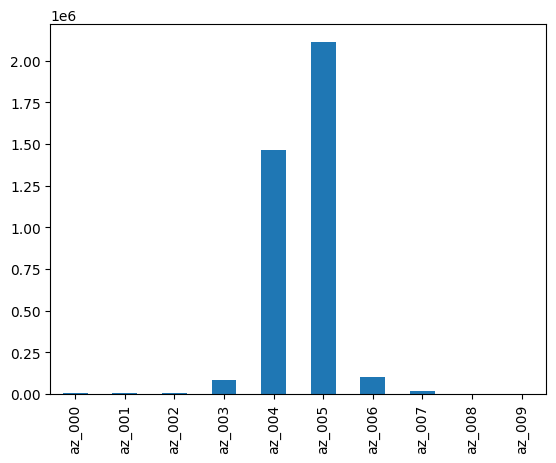

In [15]:
train_df.filter(regex='az_[0-9][0-9][0-9]').replace('na', 0).astype(int).mean().plot(kind='bar')

<Axes: >

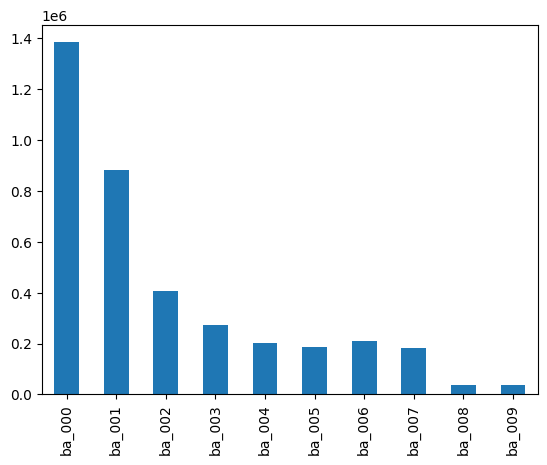

In [16]:
train_df.filter(regex='ba_[0-9][0-9][0-9]').replace('na', 0).astype(int).mean().plot(kind='bar')

<Axes: >

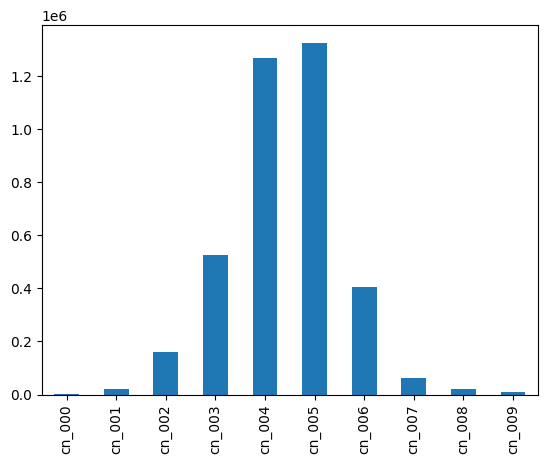

In [17]:
train_df.filter(regex='cn_[0-9][0-9][0-9]').replace('na', 0).astype(int).mean().plot(kind='bar')

In [18]:
train_df_for_corr = train_df.copy()

In [19]:
#look at the correlation between the columns against the targe
train_df_for_corr["class"] = train_df_for_corr["class"].replace(['neg', 'pos'], [0, 1])
train_df_for_corr = train_df_for_corr.replace('na', 0).astype(float).corr()

In [20]:
#get non categorical columns
numerical_columns = cols[~categorical_cols_idx]
numerical_columns = numerical_columns[2:]

In [21]:
numerical_columns

2      ab_000
3      ac_000
4      ad_000
5      ae_000
6      af_000
        ...  
156    eb_000
157     ec_00
158    ed_000
169    ef_000
170    eg_000
Length: 99, dtype: object

In [22]:
#plot the non categorical columns
relevant_col_bools = train_df_for_corr["class"].abs()[numerical_columns].sort_values(ascending=False) > 0.3

In [23]:
#get the columns that are relevant
relevant_numerical_cols = relevant_col_bools[relevant_col_bools].index

In [24]:
train_df[relevant_numerical_cols]

,ci_000,bt_000,bb_000,bv_000,bu_000,cq_000,aq_000,bj_000,cc_000,ah_000,...,dn_000,ck_000,bi_000,am_0,al_000,ed_000,dt_000,cm_000,ds_000,cj_000
0,5245752,76698.08,6700214,6700214,6700214,6700214,1132040,799478,6167850,2551696,...,62282,916567.68,947550,0,0,2712,37928,1924,202710,0
1,2291079.36,33057.51,3646660,3646660,3646660,3646660,338544,392208,2942850,1393352,...,33736,643536.96,688314,0,0,2334,16254,0,103330,0
2,2322692.16,41040.08,2673338,2673338,2673338,2673338,153698,139730,2560566,1234132,...,13876,236099.52,160176,0,0,1020,10534,0,65772,0
3,2135.04,12.69,21614,21614,21614,21614,1014,3090,7710,2668,...,232,4525.44,7632,3894,642,54,18,16,48,0
4,3565684.8,60874.03,4289260,4289260,4289260,4289260,551022,399410,3946944,1974038,...,44946,379111.68,653692,0,0,1176,35154,746,149474,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8289544.32,153001.45,10845228,10845228,10845228,10845228,776370,678792,9826660,4880368,...,62846,1529548.8,1244058,2114,1224,2858,54496,2360,265640,0
59996,123344.64,2285.92,147638,147638,147638,147638,11622,9572,135982,56982,...,1066,11387.52,14404,0,0,82,510,28,2450,0
59997,7518.72,112.49,43738,43738,43738,43738,874,6224,23310,8784,...,622,10493.76,7640,0,0,134,58,96,162,4221.12
59998,4776505.92,80292.76,6159728,6159728,6159728,6159728,1214970,1032454,5935484,2634394,...,79230,1048805.76,580084,0,0,1908,40564,1254,166748,106006.08


In [25]:
labels = train_df.pop('class')

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Y = labels.apply(lambda x: 1 if x == 'pos' else 0).values
X = train_df[categorical_cols].replace('na', 0).astype(int).values
X_transformed = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.33, random_state=42, stratify=Y)
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
clf.fit(X_train, y_train)

/Users/firatkizilboga/Projects/LFD/APS-Failure-Prediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=0)

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19470
           1       0.76      0.54      0.63       330

    accuracy                           0.99     19800
   macro avg       0.87      0.77      0.81     19800
weighted avg       0.99      0.99      0.99     19800

[[19413    57]
 [  152   178]]


In [28]:
test_df = pd.read_csv('data/aps_failure_test_set.csv')
X = test_df[categorical_cols].replace('na', 0).astype(int).values
X_transformed = StandardScaler().fit_transform(X)
y_pred_ = clf.predict(X_transformed)

In [29]:
def labelize(x):
    if x == 1:
        return 'pos'
    else:
        return 'neg'
labelize = np.vectorize(labelize)

In [30]:
output = pd.DataFrame({'id': np.arange(1,len(y_pred_)+1),"class": labelize(y_pred_)})
output.to_csv('categorical values standardized logistic regression, output.csv', index=False)

In [31]:
from preprocessing import FactorAnalysis

FA = FactorAnalysis(50)
X = train_df[categorical_cols].replace('na', 0).astype(int).values
X_transformed = StandardScaler().fit_transform(X)

FA.fit(X_transformed)
X_transformed_ = FA.transform(X_transformed)

X_train, X_test, y_train, y_test = train_test_split(X_transformed_, Y, test_size=0.33, random_state=42, stratify=Y)
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19470
           1       0.74      0.51      0.61       330

    accuracy                           0.99     19800
   macro avg       0.87      0.75      0.80     19800
weighted avg       0.99      0.99      0.99     19800

[[19412    58]
 [  161   169]]


/Users/firatkizilboga/Projects/LFD/APS-Failure-Prediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
FA.explained_variance_ratio.sum()

0.9934842737430886

In [33]:
#run the same experiment with XGBoost

from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19470
           1       0.82      0.58      0.68       330

    accuracy                           0.99     19800
   macro avg       0.91      0.79      0.84     19800
weighted avg       0.99      0.99      0.99     19800

[[19429    41]
 [  137   193]]


In [34]:
#xgboost without factor analysis

clf = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.33, random_state=42, stratify=Y)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19470
           1       0.88      0.64      0.74       330

    accuracy                           0.99     19800
   macro avg       0.93      0.82      0.87     19800
weighted avg       0.99      0.99      0.99     19800

[[19440    30]
 [  118   212]]


Factor analysis fails.

In [35]:
#use test set to predict
X = test_df[categorical_cols].replace('na', 0).astype(int).values
X_transformed = StandardScaler().fit_transform(X)
y_pred_ = clf.predict(X_transformed)

output = pd.DataFrame({'id': np.arange(1,len(y_pred_)+1),"class": labelize(y_pred_)})
output.to_csv('categorical values standardized xgboost, output.csv', index=False)

In [36]:
#add two column types together
num_cat_cols = pd.Index(categorical_cols).append(pd.Index(relevant_numerical_cols))

In [37]:
relevant_numerical_cols

Index(['ci_000', 'bt_000', 'bb_000', 'bv_000', 'bu_000', 'cq_000', 'aq_000',
       'bj_000', 'cc_000', 'ah_000', 'an_000', 'bg_000', 'ao_000', 'bx_000',
       'ap_000', 'by_000', 'bh_000', 'dn_000', 'ck_000', 'bi_000', 'am_0',
       'al_000', 'ed_000', 'dt_000', 'cm_000', 'ds_000', 'cj_000'],
      dtype='object')

In [38]:
num_cat_cols

Index(['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006',
       'ag_007', 'ag_008', 'ag_009', 'ay_000', 'ay_001', 'ay_002', 'ay_003',
       'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000',
       'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007',
       'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004',
       'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'cn_000', 'cn_001',
       'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008',
       'cn_009', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005',
       'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ee_000', 'ee_001', 'ee_002',
       'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009',
       'ci_000', 'bt_000', 'bb_000', 'bv_000', 'bu_000', 'cq_000', 'aq_000',
       'bj_000', 'cc_000', 'ah_000', 'an_000', 'bg_000', 'ao_000', 'bx_000',
       'ap_000', 'by_000', 'bh_000', 'dn_000', 'ck_000', 'bi_000', 'am_0',
 

In [39]:
X = train_df[num_cat_cols].replace('na', 0).astype(float).values
X_transformed = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.33, random_state=42, stratify=Y)

clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19470
           1       0.86      0.75      0.80       330

    accuracy                           0.99     19800
   macro avg       0.93      0.87      0.90     19800
weighted avg       0.99      0.99      0.99     19800

[[19431    39]
 [   83   247]]


In [40]:
#use test set to predict
X = test_df[num_cat_cols].replace('na', 0).astype(float).values
X_transformed = StandardScaler().fit_transform(X)
y_pred_ = clf.predict(X_transformed)

output = pd.DataFrame({'id': np.arange(1,len(y_pred_)+1),"class": labelize(y_pred_)})
output.to_csv('categorical+relevant numerical values standardized xgboost, output.csv', index=False)

In [41]:
#lets apply factor analysis to the numerical columns
FA = FactorAnalysis(50)

numericals = train_df[numerical_columns].replace('na', 0).astype(float).values
numericals_transformed = StandardScaler().fit_transform(numericals)

FA.fit(numericals_transformed)
numericals_transformed_ = FA.transform(numericals_transformed)
X = train_df[categorical_cols].replace('na', 0).astype(int).values
X = np.concatenate((X, numericals_transformed_), axis=1)

X_transformed = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42, stratify=Y)

In [42]:
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19470
           1       0.86      0.72      0.79       330

    accuracy                           0.99     19800
   macro avg       0.93      0.86      0.89     19800
weighted avg       0.99      0.99      0.99     19800

[[19432    38]
 [   91   239]]


FA Hurts performance.

In [43]:
from preprocessing import LDA

In [50]:
X = train_df[num_cat_cols].replace('na', 0).astype(float).values
X_transformed = StandardScaler().fit_transform(X)
lda = LDA(70)
lda.fit(X_transformed, Y)
X_transformed_ = lda.transform(X_transformed)
X_train, X_test, y_train, y_test = train_test_split(X_transformed_, Y, test_size=0.33, random_state=42, stratify=Y)

(60000, 97) (97, 70)


In [53]:
lda.explained_variance_ratio

-66983.46644071498

In [51]:
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19470
           1       0.82      0.72      0.77       330

    accuracy                           0.99     19800
   macro avg       0.91      0.86      0.88     19800
weighted avg       0.99      0.99      0.99     19800

[[19419    51]
 [   93   237]]


In [49]:
# #use keras to create a neural network
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation
# #use momentum optimizer
# from keras.optimizers import SGD
# from keras import regularizers


In [160]:
# model = Sequential()

# model.add(Dense(64, input_dim=X.shape[1],
#                 activation='relu',
#                 kernel_regularizer=regularizers.l2(0.01),
#                 activity_regularizer=regularizers.l1(0.01)))
# model.add(Dropout(0.3))
# model.add(Dense(64, activation='relu',
#                 kernel_regularizer=regularizers.l2(0.01),
#                 activity_regularizer=regularizers.l1(0.01)))
# model.add(Dropout(0.3))
# model.add(Dense(32, activation='relu',
#                 kernel_regularizer=regularizers.l2(0.01),
#                 activity_regularizer=regularizers.l1(0.01)))
# model.add(Dropout(0.3))
# model.add(Dense(1, activation='sigmoid'))

# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9)
# from keras import backend as K

# def f1_score(y_true, y_pred): 
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#     precision = true_positives / (predicted_positives + K.epsilon())
#     recall = true_positives / (possible_positives + K.epsilon())
#     f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
#     return f1_val

# model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=[f1_score])

NameError: name 'Sequential' is not defined

Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Would remove:
    /Users/firatkizilboga/Projects/LFD/APS-Failure-Prediction/.venv/lib/python3.11/site-packages/keras-2.15.0.dist-info/*
    /Users/firatkizilboga/Projects/LFD/APS-Failure-Prediction/.venv/lib/python3.11/site-packages/keras/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
